In [6]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PooledOLS, compare
import statistics

In [49]:
#Import Returns Data
dfcc = pd.read_csv('data1.csv')
dfr = dfcc[['date','ret_au','ret_bz','ret_us','rv5_au','rv5_bz','rv5_us','p_total_cases_wd']]
dfr.drop(dfr[dfr['date'] < 20210330].index, inplace=True)
dfr.drop(dfr[dfr['date'] > 20210510].index, inplace=True)
dfr = dfr.iloc[::-1]
dfr = dfr.reset_index(drop=True)
display(dfr.head())
display(dfr.loc[0][1])


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ret_au,ret_bz,ret_us,rv5_au,rv5_bz,rv5_us,p_total_cases_wd
0,20210330,-0.009510,0.012322,-0.003163,0.000034,0.000080,0.000034,0.008070
1,20210331,0.006749,-0.001850,0.003616,0.000061,0.000068,0.000015,0.005314
2,20210401,0.006704,-0.011906,0.011756,0.000049,0.000082,0.000016,0.005507
3,20210402,0.007740,0.003780,0.013000,0.000067,0.000075,0.000015,0.004878
4,20210405,0.008780,0.019463,0.014335,0.000086,0.000068,0.000014,0.008115


-0.009510146

In [50]:
#Dates
date = ['3/30/2021','3/31/2021','4/01/2021','4/02/2021','4/05/2021','4/06/2021','4/07/2021','4/08/2021','4/09/2021','4/12/2021','4/13/2021', \
        '4/14/2021','4/15/2021','4/16/2021','4/19/2021','4/20/2021','4/21/2021','4/22/2021', '4/23/2021', '4/26/2021', \
        '4/27/2021','4/28/2021','4/29/2021','4/30/2021','5/03/2021','5/04/2021','5/05/2021','5/06/2021','5/07/2021', \
        '5/10/2021']
dfr['date'] = date 
dfr['date'] = pd.to_datetime(dfr['date'].astype(str))

display(dfr.loc[0][1])


-0.009510146

In [51]:
#Define Mean Equation

const = [[-0.003998, 0.001144, -0.000357],[-0.001412, 0.001035, 0.000367],[0.001584, 0.001627, 0.00105]]
c1 = [[-0.389159, 0.236616, 0.18975],[-0.332228, 0.238985, 0.038944],[-0.287033, 0.083252, -0.070567]]
c2 = [[-0.050583,-0.121642,0.133854],[-0.026366, -0.208925, -0.010967],[0.032244, -0.247474, -0.046628]]
c3 = [[0.099847, -0.074658, -0.197057],[0.124881, -0.137312, -0.267509],[0.307503, -0.121192, -0.33335]]

mlen = len(const)

display(const[0])
#Predicted Returns
ForcRet = []
for model in range(mlen):
    modelList = []
    ForcRet.append(modelList)
    for country in range(3):
        innerList = []
        modelList.append(innerList)
        for n in range(29):
            innerList.append(const[model][country] + c1[model][country]*dfr['ret_au'][n] + c2[model][country]*dfr['ret_bz'][n] + c3[model][country]*dfr['ret_us'][n])


[-0.003998, 0.001144, -0.000357]

In [52]:
#MSE
Diff = []
MSE = []
RMSE = []
for model in range(mlen):
    modelList = []
    Diff.append(modelList)
    for country in range(3):
        innerList1 = []
        modelList.append(innerList1)
        for n in range(28):
            innerList1.append((ForcRet[model][country][n+1]-dfr.loc[n+2][country+1])**2)
        MSE1 = statistics.mean(innerList1)
        MSE.append(MSE1)
        RMSE.append(MSE1**(0.5))

display(MSE)
display(RMSE)

[8.935449693519109e-05,
 7.579119973055147e-05,
 5.273170788117708e-05,
 5.2984516876601856e-05,
 7.749868394330734e-05,
 5.50574877394911e-05,
 2.9745601538357836e-05,
 7.798932245987079e-05,
 5.8577404129722795e-05]

[0.009452750760238582,
 0.008705814133701193,
 0.007261660132585185,
 0.007279046426325488,
 0.008803333683514861,
 0.007420073297447344,
 0.005453952836095838,
 0.008831156348965337,
 0.007653587663947072]

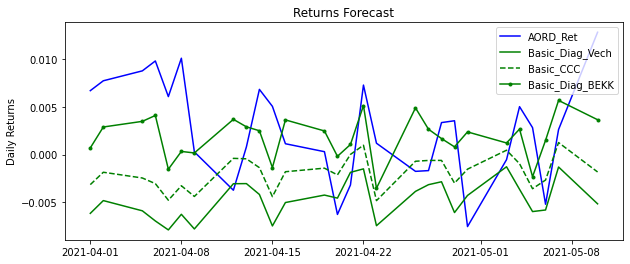

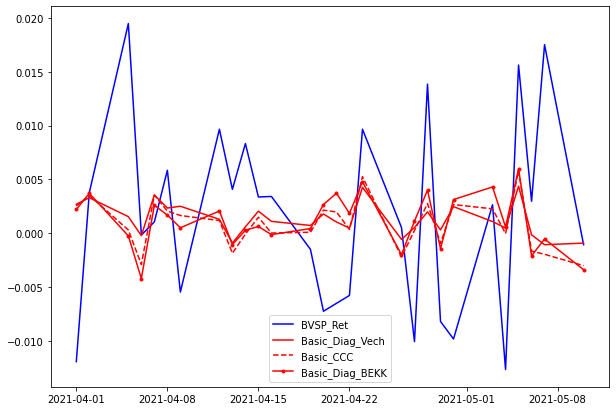

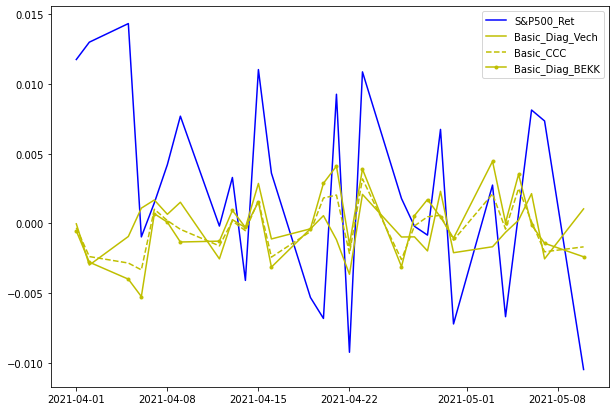

In [62]:
#Graph Results
import matplotlib.dates as mdates

#Graph 1
plt.title('Returns Forecast')
plt.ylabel('Daily Returns')
x = dfr['date'][2:30]
# dtFmt = mdates.DateFormatter('%d') # define the formatting
# plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis


plt.plot(x,dfr['ret_au'][2:30], '-b', label='AORD_Ret')
plt.plot(x,ForcRet[0][0][1:29], '-g', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][0][1:29], '--g', label='Basic_CCC')
plt.plot(x,ForcRet[2][0][1:29], '.-g', label='Basic_Diag_BEKK')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

plt.plot(x,dfr['ret_bz'][2:30], '-b', label='BVSP_Ret')
plt.plot(x,ForcRet[0][1][1:29], '-r', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][1][1:29], '--r', label='Basic_CCC')
plt.plot(x,ForcRet[2][1][1:29], '.-r', label='Basic_Diag_BEKK')

plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

plt.plot(x,dfr['ret_us'][2:30], '-b', label='S&P500_Ret')
plt.plot(x,ForcRet[0][2][1:29], '-y', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][2][1:29], '--y', label='Basic_CCC')
plt.plot(x,ForcRet[2][2][1:29], '.-y', label='Basic_Diag_BEKK')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()



In [70]:
#Forecast Volatility
w = [[-1.12E-05, 1.86E-05, 9.70E-06],[-2.00E-05,1.90E-05,1.27E-05],[9.64E-07, 1.62E-05, 1.03E-05]]
arch = [[0.06640490806, 0.01270520331, 0.1407023335],[0.06546840302,0.01129381619,0.1541754291],[0.01835733359, 0.001074889729,0.1271927596]] 
garch = [[0.9924008191, 0.9302269783, 0.8017496614],[0.9975141231,0.938307941,0.8647307883],[0.9258184145, 0.9188332324, 0.8072647353]]
sigmat =[[0.000213, 0.000304, 9.25E-05],[1.24E-05,0.0003465788073,0.0001835408264],[2.56E-05, 0.000202127463, 0.0001060424569]]

mlen = len(w)
display(mlen)

#ResidualSQr
ResidSqr = []
for model in range(mlen):
    modelList = []
    ResidSqr.append(modelList)
    for country in range(3):
        innerList2 = []
        modelList.append(innerList2)
        for n in range(29):
            innerList2.append((ForcRet[model][country][n]-dfr.loc[n+1][country+1])**2)
# display(ResidSqr[0])
# display(ResidSqr[3])

#Sigma Forecast
GARCHForc = []
for model in range(mlen):
    modelList = []
    GARCHForc.append(modelList)
    for country in range(3):
        innerList3 = []
        sigma = sigmat[model][country]
        modelList.append(innerList3)
        for n in range(28):
            sigma = w[model][country] + arch[model][country]*ResidSqr[model][country][n] + garch[model][country]*sigma
            innerList3.append(sigma)

display(GARCHForc[0])


3

[[0.00020441574030385048,
  0.00020266814192632473,
  0.00020042183405676972,
  0.00020201561153263797,
  0.00020799200032045392,
  0.0002082023295962598,
  0.0002132278986905941,
  0.00020474469994234603,
  0.00019201969998838153,
  0.0001803456028549171,
  0.0001758452522913392,
  0.0001737577995608233,
  0.00016376354483259672,
  0.000152695420150127,
  0.00014052981328909416,
  0.00012837807054130555,
  0.00012133445376530212,
  0.0001141875182076438,
  0.00010241273552116524,
  9.057922679488549e-05,
  8.125010376319279e-05,
  7.559466884772519e-05,
  6.452834885668526e-05,
  5.287505167953312e-05,
  4.6269135513005826e-05,
  3.986603210695278e-05,
  2.8387073402590254e-05,
  1.7997786717478913e-05],
 [0.000301392425607875,
  0.0003016723691193301,
  0.0002992266928761227,
  0.0003010277208839531,
  0.0002986241385610121,
  0.0002964675951914882,
  0.0002945380385470167,
  0.0002933926441142762,
  0.0002924094220523836,
  0.0002909220910691113,
  0.0002899836863796726,
  0.0002883

In [71]:
#MSE
Diff = []
MSE = []
RMSE = []

for model in range(mlen):
    modelList = []
    Diff.append(modelList)
    for country in range(3):
        innerList4 = []
        modelList.append(innerList4)
        for n in range(28):
            innerList4.append((GARCHForc[model][country][n]-dfr.loc[n+2][country+4])**2)
        MSE1 = statistics.mean(innerList4)
        MSE.append(MSE1)
        RMSE.append(MSE1**(0.5))

display(MSE)
display(RMSE)

#Qlike
Logform = []
QLIKE = []

for model in range(mlen):
    for country in range(3):
        innerList5 = []
        Logform.append(innerList5)
        for n in range(28):
            innerList5.append(np.log(GARCHForc[model][country][n])+dfr.loc[n+2][country+4]/GARCHForc[model][country][n])
        Qlike1 = statistics.mean(innerList5)        
        QLIKE.append(Qlike1)

display(QLIKE, "Natural Log")

[1.4246954287778457e-08,
 5.6208566902137984e-08,
 4.606891534451504e-09,
 7.625483935157385e-08,
 7.847707291357859e-08,
 2.0811988035803554e-08,
 6.05545068021089e-10,
 2.2546315204354924e-08,
 5.884460212977948e-09]

[0.00011936060609672882,
 0.00023708345978186242,
 6.787408588299e-05,
 0.0002761427879767528,
 0.0002801375963943051,
 0.0001442636060682096,
 2.460782534116107e-05,
 0.00015015430464810167,
 7.671023538601578e-05]

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log


[-8.770753344648467,
 -7.967543140255001,
 -9.071014579518977,
 nan,
 -7.851727565711414,
 -8.569297012570457,
 -9.318108298305757,
 -8.249150726732507,
 -9.001508479012276]

'Natural Log'

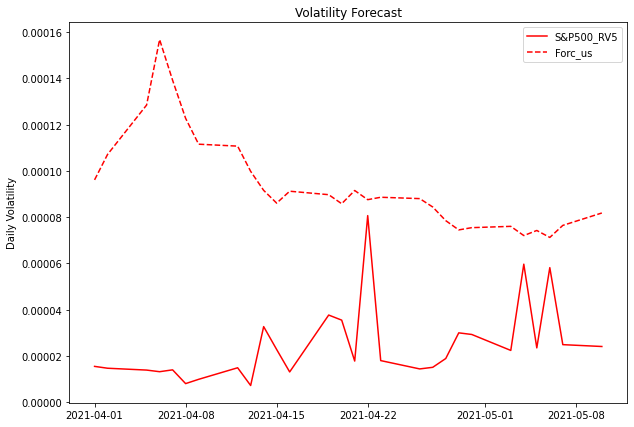

In [73]:
#Graph
#Graph 1
plt.title('Volatility Forecast')
plt.ylabel('Daily Volatility')
x = dfr['date'][2:30]

plt.plot(x,dfr['rv5_au'][2:30], '-g', label='AORD_RV5')
plt.plot(x,GARCHForc[2][0][0:28], '--g', label='Basic_Diag_Bekk')
plt.plot(x,dfr['rv5_bz'][2:30], '-y', label='BVSP_RV5')
plt.plot(x,GARCHForc[2][1][0:28], '--y', label='Forc_bz')
plt.plot(x,dfr['rv5_us'][2:30], '-r', label='S&P500_RV5')
plt.plot(x,GARCHForc[2][2][0:28], '--r', label='Forc_us')

plt.legend()
plt.rcParams['figure.figsize'] = [10, 7]
plt.show()

# plt.plot(x,dfr['rv5_bz'][2:30], '-y', label='BVSP_RV5')
# plt.plot(x,GARCHForc[2][1][0:28], '--y', label='Forc_bz')

# plt.legend()
# plt.rcParams['figure.figsize'] = [10, 7]
# plt.show()


# plt.legend()
# plt.rcParams['figure.figsize'] = [10, 7]
# plt.show()

In [57]:
#Define Mean Equation

const = [[-0.001859099858, 0.0007290466469, 1.26E-05],[0.0001580196695,-0.0002512162114,0.002026816611],[-0.000203, 0.001232, 0.00059]]
c1 = [[-0.454578775, -0.105002362, -0.07652320321],[-0.3023574841,-0.2444089202,-0.425753994],[-0.370859, -0.210348, -0.228266]]
c2 = [[-0.037670701,-0.04847165426,-0.1155901246],[-0.05462191964,-0.05151314265,-0.1155078023],[-0.035694, -0.016563, -0.028827]]

mlen = len(const)

display(const[0])
#Predicted Returns
ForcRetInc = []
for model in range(mlen):
    modelList = []
    ForcRetInc.append(modelList)
    for country in range(3):
        innerList = []
        modelList.append(innerList)
        for n in range(29):
            innerList.append(const[model][country] + c1[model][country]*dfr.loc[n][country+1] + c2[model][country]*dfr['p_total_cases_wd'][n])

display(ForcRetInc)

[-0.001859099858, 0.0007290466469, 1.26e-05]

[[[0.0021600075762913365,
   -0.005127363383502214,
   -0.005114044934760042,
   -0.005561285502719287,
   -0.006155984662553713,
   -0.0066407535370975835,
   -0.004816725734573946,
   -0.006689858526512654,
   -0.002194276145213325,
   -0.0005275751170743059,
   -0.002615335198367407,
   -0.005189841186085148,
   -0.004379088498705679,
   -0.0026052611072929347,
   -0.0023909111515347716,
   0.0005877689180598402,
   -0.000642345822055355,
   -0.0054072128867747446,
   -0.002634125587452561,
   -0.001451057700295447,
   -0.001485575748177132,
   -0.0036119202365333778,
   -0.0036961780170196986,
   0.001356521271185255,
   -0.001980711992488663,
   -0.004507400650216016,
   -0.0033469013682975238,
   0.0003009373001596397,
   -0.00325233533522269],
  [-0.0009559255753847956,
   0.0006656803580400197,
   0.0017122779120661716,
   9.57081122158492e-05,
   -0.0017079279201555734,
   0.0003367576792849832,
   0.0003678013421503806,
   -0.0001896880903323735,
   0.001031605724867919,
   -

In [58]:
#MSE
Diff = []
MSE = []
RMSE = []
for model in range(mlen):
    modelList = []
    Diff.append(modelList)
    for country in range(3):
        innerList1 = []
        modelList.append(innerList1)
        for n in range(28):
            innerList1.append((ForcRetInc[model][country][n+1]-dfr.loc[n+2][country+1])**2)
        MSE1 = statistics.mean(innerList1)
        MSE.append(MSE1)
        RMSE.append(MSE1**(0.5))

display(MSE)
display(RMSE)

[7.273181758098953e-05,
 7.664990426947009e-05,
 5.813805632135976e-05,
 4.623061906087927e-05,
 8.188880338838525e-05,
 5.607104003775748e-05,
 5.15085107360648e-05,
 7.603000002052156e-05,
 5.485962965698223e-05]

[0.008528295115730314,
 0.00875499310504983,
 0.00762483156019592,
 0.006799310190076584,
 0.009049243249486956,
 0.007488059831341993,
 0.0071769429937867555,
 0.008719518336497811,
 0.007406728674454211]

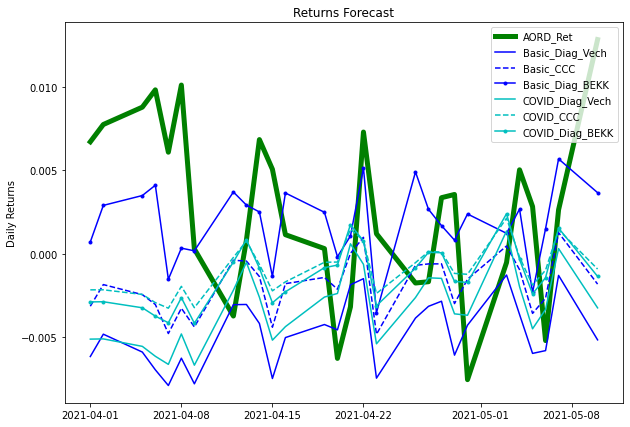

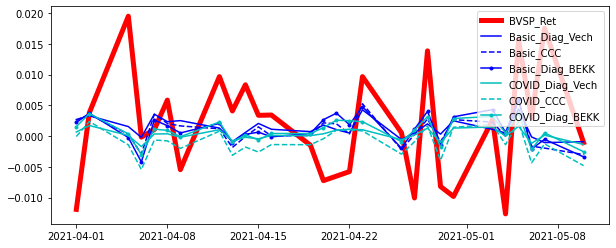

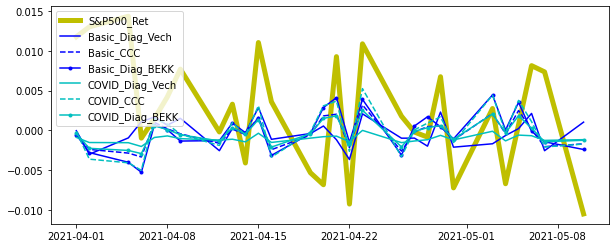

In [59]:
#Graph 1
plt.title('Returns Forecast')
plt.ylabel('Daily Returns')
x = dfr['date'][2:30]
# dtFmt = mdates.DateFormatter('%d') # define the formatting
# plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.rcParams['figure.figsize'] = [10, 4]

plt.plot(x,dfr['ret_au'][2:30], '-g',linewidth=5, label='AORD_Ret')
plt.plot(x,ForcRet[0][0][1:29], '-b', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][0][1:29], '--b', label='Basic_CCC')
plt.plot(x,ForcRet[2][0][1:29], '.-b', label='Basic_Diag_BEKK')
plt.plot(x,ForcRetInc[0][0][1:29], '-c', label='COVID_Diag_Vech')
plt.plot(x,ForcRetInc[1][0][1:29], '--c', label='COVID_CCC')
plt.plot(x,ForcRetInc[2][0][1:29], '.-c', label='COVID_Diag_BEKK')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

plt.plot(x,dfr['ret_bz'][2:30], '-r',linewidth=5, label='BVSP_Ret')
plt.plot(x,ForcRet[0][1][1:29], '-b', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][1][1:29], '--b', label='Basic_CCC')
plt.plot(x,ForcRet[2][1][1:29], '.-b', label='Basic_Diag_BEKK')
plt.plot(x,ForcRetInc[0][1][1:29], '-c', label='COVID_Diag_Vech')
plt.plot(x,ForcRetInc[1][1][1:29], '--c', label='COVID_CCC')
plt.plot(x,ForcRetInc[2][1][1:29], '.-c', label='COVID_Diag_BEKK')

plt.legend()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()

plt.plot(x,dfr['ret_us'][2:30], '-y',linewidth=5, label='S&P500_Ret')
plt.plot(x,ForcRet[0][2][1:29], '-b', label='Basic_Diag_Vech')
plt.plot(x,ForcRet[1][2][1:29], '--b', label='Basic_CCC')
plt.plot(x,ForcRet[2][2][1:29], '.-b', label='Basic_Diag_BEKK')
plt.plot(x,ForcRetInc[0][2][1:29], '-c', label='COVID_Diag_Vech')
plt.plot(x,ForcRetInc[1][2][1:29], '--c', label='COVID_CCC')
plt.plot(x,ForcRetInc[2][2][1:29], '.-c', label='COVID_Diag_BEKK')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 4]
plt.show()